In [117]:
import pandas as pd

train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
print(train.head())  # View first few rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [118]:
print(train.isnull().sum())  # Identify missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [119]:
train.loc[:, 'Age'] = train['Age'].fillna(train['Age'].mean())

In [120]:
print(train['Age'].isnull().sum())  # Should print 0

0


In [121]:
train.dropna(subset=['Cabin'], inplace=True)

In [122]:
print(train['Cabin'].isnull().sum())  # Should print 0

0


In [123]:
print(train.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


In [124]:
print(train.isnull().sum())  # Identify missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [125]:
train.loc[:, 'Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [126]:
print(train['Embarked'].isnull().sum())  # Should print 0

0


In [127]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [128]:
print(train.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked  
1       0  PC 17599  71.2833   C85         0  
3       0    113803  53.1000  C123         2  
6       0     17463  51.8625   E46         2  
10      1   PP 9549  16.7000    G6         2  
11      0    113783  26.5500  C103         2  


In [129]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,0
3,4,1,1,1,35.0,1,0,53.1000,2
6,7,0,1,0,54.0,0,0,51.8625,2
10,11,1,3,1,4.0,1,1,16.7000,2
11,12,1,1,1,58.0,0,0,26.5500,2


In [131]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

In [133]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
1,2,1,1,1,0.182812,1,0,-0.065466,0,2
3,4,1,1,1,-0.017227,1,0,-0.310494,2,2
6,7,0,1,0,1.249682,0,0,-0.327170,2,1
10,11,1,3,1,-2.084288,1,1,-0.800999,2,3
11,12,1,1,1,1.516400,0,0,-0.668266,2,1


In [134]:
X_train = train.drop("Survived", axis=1)  # Features
y_train = train["Survived"]  # Target variable

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [136]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, solver='saga')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='saga')

In [137]:
train_accuracy = model.score(X_train_scaled, y_train)  # For Logistic Regression
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.75


In [138]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [139]:
test = pd.read_csv("titanic/test.csv")

# Apply previous cleaning steps to test data
test.loc[:, 'Age'] = test['Age'].fillna(test['Age'].mean())
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Scale test data (if using Logistic Regression)
test_scaled = scaler.transform(test)

In [140]:
import numpy as np

print("NaN values:", np.isnan(test_scaled).sum())  # Count NaNs
print("Infinite values:", np.isinf(test_scaled).sum())  # Count infinite values

NaN values: 1
Infinite values: 0


In [141]:
test.fillna(test.mean(), inplace=True)  # Fill NaN values

In [142]:
print(test.isnull().sum())  # Should all be 0

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
dtype: int64


In [143]:
import numpy as np
print("NaN values after scaling:", np.isnan(test_scaled).sum())

NaN values after scaling: 1


In [144]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Fills NaNs with column mean
test_scaled = imputer.fit_transform(test_scaled)

In [145]:
import numpy as np
print("NaN values after scaling:", np.isnan(test_scaled).sum())

NaN values after scaling: 0


In [146]:
predictions = model.predict(test_scaled)

In [147]:
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(test_scaled)  # If using Logistic Regression
# OR
# y_pred_test_rf = rf_model.predict(test)  # If using Random Forest

print("Test Accuracy (Logistic Regression):", accuracy_score(y_train, model.predict(X_train_scaled)))
# print("Test Accuracy (Random Forest):", accuracy_score(y_train, rf_model.predict(X_train)))

Test Accuracy (Logistic Regression): 0.7549019607843137


In [154]:
import pandas as pd

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv("submission.csv", index=False)

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [156]:
predictions_rf = rf_model.predict(test)

In [157]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.2f}")

Random Forest Training Accuracy: 0.92


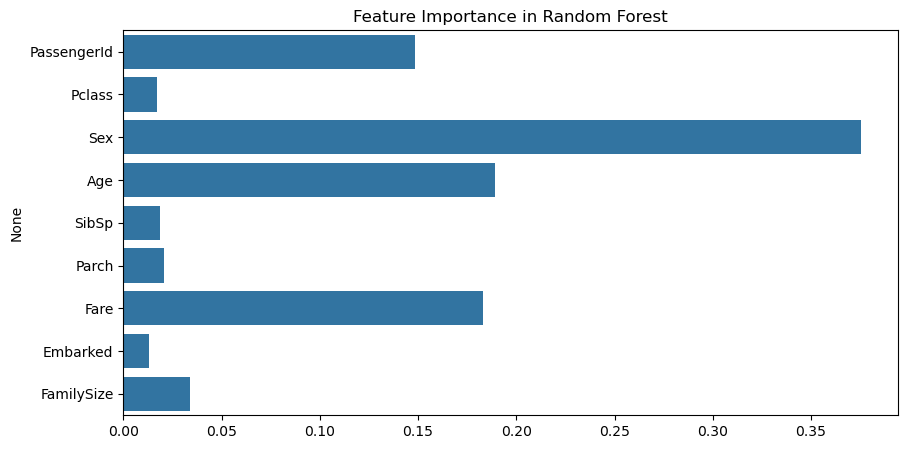

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Random Forest")
plt.show()

In [159]:
submission_rf = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions_rf})
submission_rf.to_csv("submission_rf.csv", index=False)

In [160]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [162]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=10, min_samples_leaf=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [163]:
predictions_rf = rf_model.predict(test)

In [164]:
from sklearn.metrics import accuracy_score

train_accuracy_rf_param = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Random Forest Training Accuracy: {train_accuracy_rf_param:.2f}")

Random Forest Training Accuracy: 0.83


In [166]:
predictions_rf = rf_model.predict(test)

In [167]:
predictions_rf

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [168]:
import pandas as pd

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions_rf})
submission.to_csv('submission.csv', index=False)